In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Importar datos
 

In [2]:

data = pd.read_csv('banking.csv', header = 0)
data = data.dropna() ##Dropping NA fields

print(data.shape)
print(list(data.columns))

(37106, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [3]:

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3.0,6.0,2.0,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1.0,3.0,1.0,success,-2.9,92.201,-31.4,0.869,5076.2,1.0



#### Entradas

1.edad (numérico)
2.Trabajo: tipo de trabajo (categórico: “admin”, “obrero”, “emprendedor”, “empleada doméstica”, “gerencia”, “jubilado”, “autónomo”, “servicios”, “estudiante”, "Técnico", "desempleado", "desconocido")
3.marital: estado civil (categórico: "divorciado", "casado", "soltero", "desconocido")
4.educación (categóricas: "básico.4y", "básico.6y", "básico.9y", "preparatoria", "analfabeto", "curso.profesional", "título universitario", "desconocido")
5.predeterminado: ¿tiene crédito en mora? (categórico: "no", "sí", "desconocido")
6.vivienda: ¿tiene préstamo para vivienda? (categórico: "no", "sí", "desconocido")
7.préstamo: ¿tiene préstamo personal? (categórico: "no", "sí", "desconocido")
8.contact: tipo de comunicación de contacto (categórico: "celular", "teléfono")
9.mes: último mes de contacto del año (categórico: “ene”, “feb”, “mar”,…, “nov”, “dec”)
10.day_of_week: último día de contacto de la semana (categórico: "lun", "mar", "mié", "jue", "vie")
11.duration: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida al objetivo de salida (por ejemplo, si duración = 0, entonces y = "no"). La duración no se conoce antes de que se realice una llamada, también, después del final de la llamada, obviamente se conoce y. Por lo tanto, esta entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.
12.campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye último contacto)
13.pdays: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)
4.previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)
15.poutcome: resultado de la campaña de marketing anterior (categórico: "fracaso", "inexistente", "éxito")
16.emp.var.rate: tasa de variación del empleo - (numérico)
17.cons.price.idx: índice de precios al consumidor - (numérico)
18.cons.conf.idx: índice de confianza del consumidor - (numérico)
19.euribor3m: tipo euribor a 3 meses - (numérico)
20.nr.employed: número de empleados - (numérico)


#Objetivo
y - ¿el cliente ha suscrito un depósito a plazo? (binario: "1", significa "Sí", "0" significa "No")

#### Juntando categorias



In [4]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [5]:
## agrupando - 4,6 and 9 years into basic

data['education']=np.where(data['education']=='basic.9y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.6y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.4y','Basic',data['education'])

In [6]:
## Verificando

data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)


#### Explorando la variable objetivo

In [7]:
data['y'].value_counts()

0.0    32906
1.0     4200
Name: y, dtype: int64

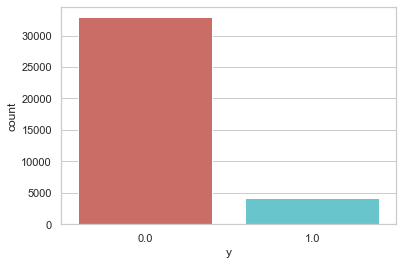

<Figure size 432x288 with 0 Axes>

In [8]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [9]:
## Data Summarization
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0.0,39.916702,220.553972,2.637027,984.247007,0.132529,0.251240,93.606002,-40.587230,3.813417,5176.139345
1.0,40.817143,552.530952,2.033333,792.093571,0.490000,-1.224238,93.360700,-39.787524,2.128867,5095.249667


** Observacion **
1. Edad promedio de las personas que depositaron más alta que las que no lo hicieron
2. Las personas que realizaron la conversión participaron durante más tiempo durante la llamada.
3. Las personas que realizaron la conversión estuvieron expuestas a menos campañas que las que no lo hicieron.


### Visualizacion 

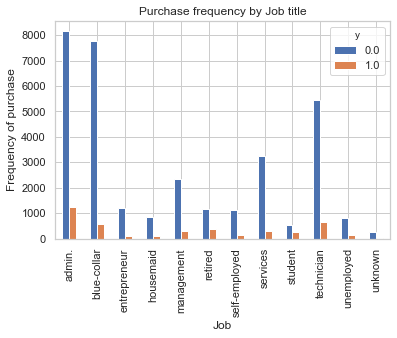

In [10]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase frequency by Job title')
plt.xlabel('Job')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_job')

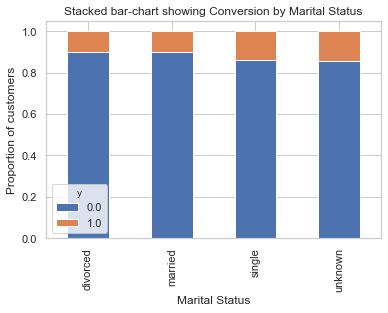

In [11]:
%matplotlib inline
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar-chart showing Conversion by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of customers')
plt.savefig('purchase_by_ms')

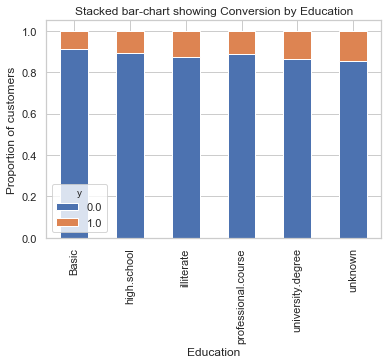

In [12]:
%matplotlib inline
table = pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar-chart showing Conversion by Education')
plt.xlabel('Education')
plt.ylabel('Proportion of customers')
plt.savefig('purchase_by_edu')

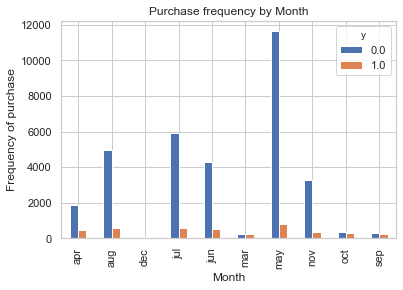

In [13]:
%matplotlib inline
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase frequency by Month')
plt.xlabel('Month')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_mnt')

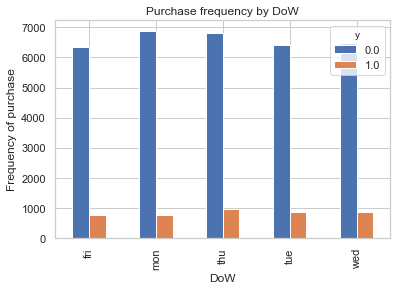

In [14]:
%matplotlib inline
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase frequency by DoW')
plt.xlabel('DoW')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_dow')

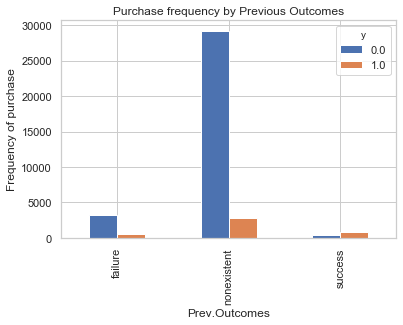

In [15]:
%matplotlib inline
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase frequency by Previous Outcomes')
plt.xlabel('Prev.Outcomes')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_pout')


###Creando variables bobas


In [16]:
categorical_variable_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for var in categorical_variable_cols:
    categ_list = 'var_' + var
    categ_list = pd.get_dummies(data[var],prefix = var)
    data1=data.join(categ_list)
    data = data1

data_vars = data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categorical_variable_cols]

In [17]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

** Setting the X & Y values **

In [18]:
data_final_vars = data_final.columns.values.tolist()
y=['y']
X = [i for i in data_final_vars if i not in y]

Seleccion de atributos
**RFE (Recursive Feature Elimination)**.  


In [19]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg,18)

rfe = rfe.fit(data_final[X],data_final[y])

Selected_Features_Support = list(rfe.support_)
Selected_Features_rank = list(rfe.ranking_)

print(Selected_Features_Support)
print(Selected_Features_rank)

C:\Users\yoda\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yoda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\yoda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of

[False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, True, True, True, False, False, True, True, True, True, False, False, True, False, False, False, True, False, True]
[34, 33, 11, 38, 1, 16, 24, 20, 1, 29, 7, 1, 30, 35, 41, 1, 4, 1, 1, 21, 25, 40, 8, 28, 15, 42, 13, 22, 44, 26, 5, 3, 1, 10, 43, 37, 36, 14, 12, 39, 27, 1, 23, 1, 1, 1, 6, 19, 1, 1, 1, 1, 31, 2, 1, 17, 18, 9, 1, 32, 1]


Features seleccionados: “previous”, “euribor3m”, “job_blue-collar”, “job_retired”, “job_services”, “job_student”, “default_no”, “month_aug”, “month_dec”, “month_jul”, “month_nov”, “month_oct”, “month_sep”, “day_of_week_fri”, “day_of_week_wed”, “poutcome_failure”, “poutcome_nonexistent”, “poutcome_success”.



In [20]:
columns_final = ["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 

X = data_final[columns_final]
y = data_final['y']

Implementacion del modelo

** Train vs Test : 70% vs 30%**

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

## Calculating the accuracy
print(logreg.coef_)

In [23]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test,y_test)))

[[ 0.22560097 -0.49836178 -0.23234053  0.37436663 -0.12562811  0.33990644
   0.34012697  0.47392479  0.87713535  0.75284856  0.22217868  0.84387288
   0.63529791 -0.07785572  0.09707778 -0.87213697 -0.1547412   1.02560851]]
Accuracy of logistic regression classifier on test set: 0.900737


### Validacion cruzada


In [24]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 10, random_state = 7)

modelCV = LogisticRegression()

scoring = 'accuracy'

results = model_selection.cross_val_score(modelCV, X_train,y_train, cv = kfold, scoring = scoring)

print("10-fold cross-validation average accuracy : %.3f" % (results.mean()))

C:\Users\yoda\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross-validation average accuracy : 0.896


. 
  
  
### (Confusion Matrix)  


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9799  100]
 [1005  228]]
